This project is about the music in spotify since 1928. Data Scoure https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020

Import the package needed.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Read the data.

In [2]:
data = pd.read_csv('spotify.csv')

Take a glimpse of the data, the colmuns indicate as following:

id (Id of track generated by Spotify)

Numerical:acousticness (Ranges from 0 to 1)

danceability (Ranges from 0 to 1)

energy (Ranges from 0 to 1)

duration_ms (Integer typically ranging from 200k to 300k)

instrumentalness (Ranges from 0 to 1)

valence (Ranges from 0 to 1)

popularity (Ranges from 0 to 100)

tempo (Float typically ranging from 50 to 150)

liveness (Ranges from 0 to 1)

loudness (Float typically ranging from -60 to 0)

speechiness (Ranges from 0 to 1)

year (Ranges from 1921 to 2020)

Dummy:mode (0 = Minor, 1 = Major)

explicit (0 = No explicit content, 1 = Explicit content)

Categorical:
key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
artists (List of artists mentioned)

release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)

name (Name of the song)

In [3]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Switch the position of id and acouticness, release_data and year.

In [4]:
col = list(data.columns)
col[0],col[6]=col[6],col[0]
col[-2],col[-5] = col[-5],col[-2]

In [135]:
new_data = data[col].copy()

In [145]:
new_data.columns

Index(['id', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit',
       'acousticness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'valence', 'speechiness', 'tempo',
       'release_date', 'year'],
      dtype='object')

The name in the artists is consist of '[' , ']', so for the readability, it better be removed.

In [146]:
def change(x):
    x = x[2:-2]
    return x

In [147]:
new_data.artists = new_data.artists.apply(change)

In the release_date, some value missing the exact date, so we use 01-01 as default, also the duration with unit ms, by change it to sec will be better.

In [148]:
new_data.release_date = pd.to_datetime(new_data.release_date)
new = round(new_data.duration_ms/1000,2)
new_data.insert(loc=17,column='duration_sec',value = new)

The id columns dont have a lot of meanings, and duration_ms is been replaced by duration_sec, so they can be dropped

In [149]:
new_data.drop(columns=['id','duration_ms'],inplace=True)

In [150]:
new_data.head()

,artists,danceability,energy,explicit,acousticness,instrumentalness,key,liveness,loudness,mode,name,popularity,valence,speechiness,tempo,duration_sec,release_date,year
0,Carl Woitschach,0.708,0.1950,0,0.995,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.7790,0.0506,118.469,158.65,1928-01-01,1928
1,"Robert Schumann', 'Vladimir Horowitz",0.379,0.0135,0,0.994,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0767,0.0462,83.972,282.13,1928-01-01,1928
2,Seweryn Goszczyński,0.749,0.2200,0,0.604,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.8800,0.9290,107.177,104.30,1928-01-01,1928
3,Francisco Canaro,0.781,0.1300,0,0.995,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.7200,0.0926,108.003,180.76,1928-09-25,1928
4,"Frédéric Chopin', 'Vladimir Horowitz",0.210,0.2040,0,0.990,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0693,0.0424,62.149,687.73,1928-01-01,1928


The dtypes of each columns seems okey, and there is no missing value.

In [151]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   artists           169909 non-null  object        
 1   danceability      169909 non-null  float64       
 2   energy            169909 non-null  float64       
 3   explicit          169909 non-null  int64         
 4   acousticness      169909 non-null  float64       
 5   instrumentalness  169909 non-null  float64       
 6   key               169909 non-null  int64         
 7   liveness          169909 non-null  float64       
 8   loudness          169909 non-null  float64       
 9   mode              169909 non-null  int64         
 10  name              169909 non-null  object        
 11  popularity        169909 non-null  int64         
 12  valence           169909 non-null  float64       
 13  speechiness       169909 non-null  float64       
 14  temp

Use the corr() to check the correlation, where danceability has a high corr with valence, energy has high corr with acousticness, loudness, popularity and valence, in this senario, high corr only means that two variable have high value of kendall correlation coefficient.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

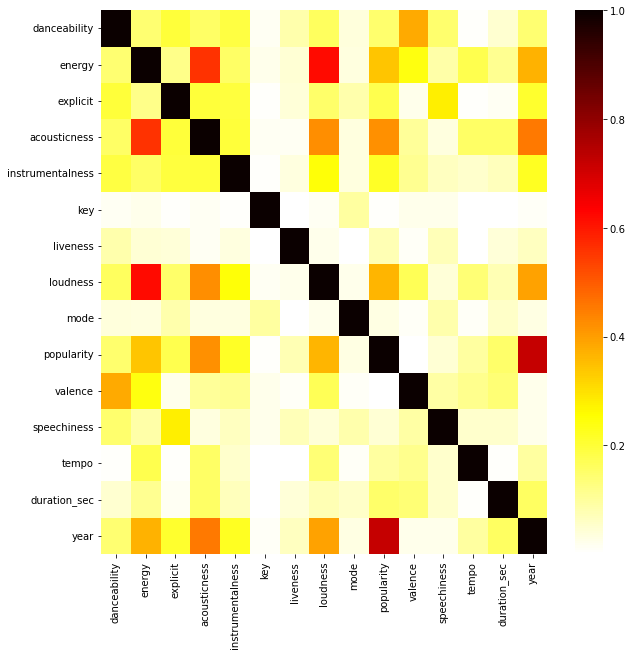

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(method='kendall').abs(),cmap='hot_r')

Select those columns with 'int' or 'float' as dtype and sotred them in a list

In [153]:
feature = list(new_data.select_dtypes(['int','float']).columns)
len(feature)

15

Plot those columns that extracted in the previous code with distplot(). The data in liveness, loudness and speechiness need to transform into normal distribution.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

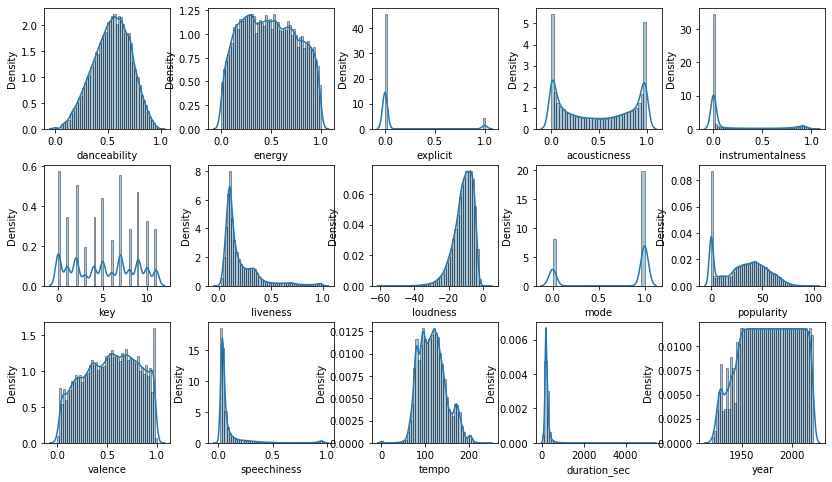

In [154]:
fig, axe = plt.subplots(3,5,figsize=(14,8))
plt.subplots_adjust(hspace=0.3,wspace=0.3)
i,j = 0, 0
for item in feature:
    sns.distplot(new_data[item],ax=axe[i][j],hist_kws=dict(edgecolor='black'))
    j += 1
    if j==5:
        i+=1
        j=0

Transform the liveness,loudness and speechiness and rename them.

In [155]:
new_data.loudness = np.sqrt(new_data.loudness.abs())
new_data.liveness = np.sqrt(new_data.liveness)
new_data.speechiness = np.sqrt(new_data.speechiness)

In [156]:
new_data.rename(columns={'loudness':'loudness_abs_sqrt','liveness':'liveness_sqrt',
                        'speechiness':'speechiness_sqrt'},inplace=True)

Grouping by the artists, count the numbers of the songs they wrote.

In [157]:
art = new_data.groupby('artists')['name'].count().sort_values(ascending=False)
art.mean()

5.090906367041199

Select the top 25 singers from the 'art', and plot them with a bar. The singer has most songs Эрнест Хемингуэй with 1215 songs, followed by Francisco Canaro, the name on the fig, more or less was famous.

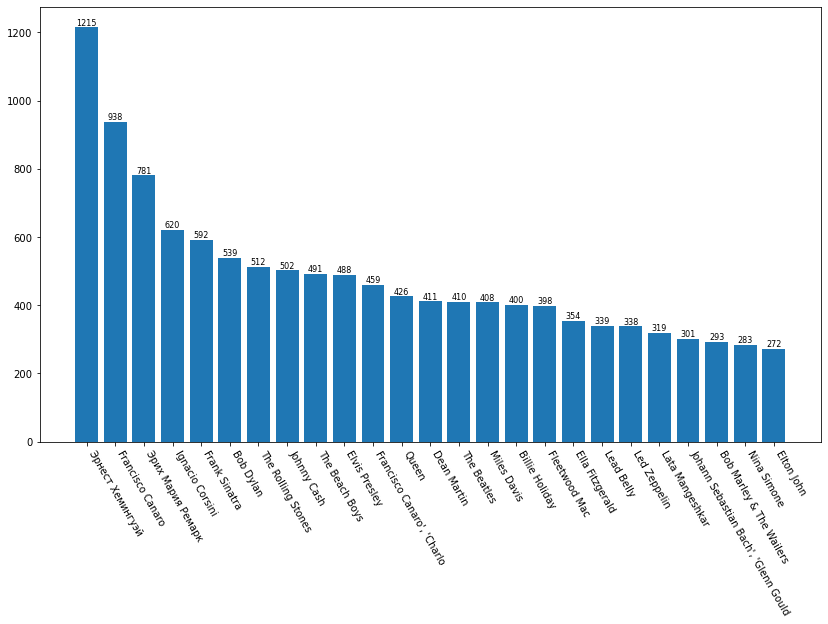

In [158]:
art_25 = art[:25]
plt.figure(figsize=(14,8))
plt.bar(art_25.index,art_25.values)
plt.xticks(rotation=300,va='top',ha='left')
for x,y in zip(art_25.index,art_25.values):
    plt.text(x,y+1,y,ha='center',va='bottom',fontsize=8)

Extract the data of taylor swift and use the head() to check to data, top most popularity song of taylor swift is 'You Need to Calm Down' which released in 2019-08-23. In the top 5 popular songs, 4 of them are released in the same data, indicated that those songs are in the same album.

In [164]:
data_taylor = new_data[new_data.artists == 'Taylor Swift']
data_taylor.sort_values('popularity',ascending=False).head()

,artists,danceability,energy,explicit,acousticness,instrumentalness,key,liveness_sqrt,loudness_abs_sqrt,mode,name,popularity,valence,speechiness_sqrt,tempo,duration_sec,release_date,year
87912,Taylor Swift,0.771,0.671,0,0.00929,0.000000,2,0.252389,2.370021,1,You Need To Calm Down,83,0.7140,0.235160,85.026,171.36,2019-08-23,2019
97640,Taylor Swift,0.777,0.658,0,0.07670,0.000000,0,0.300167,2.278377,1,The Man,82,0.6330,0.232379,110.048,190.36,2019-08-23,2019
97654,Taylor Swift,0.359,0.543,0,0.49200,0.000016,7,0.343511,2.753543,1,Lover,81,0.4530,0.303150,68.534,221.31,2019-08-23,2019
97450,Taylor Swift,0.750,0.404,0,0.21600,0.000357,9,0.301828,3.190298,0,Delicate,77,0.0499,0.261151,95.045,232.25,2017-11-10,2017
97732,Taylor Swift,0.664,0.316,0,0.29800,0.000002,5,0.284956,3.216364,1,I Forgot That You Existed,77,0.5410,0.720417,92.875,170.64,2019-08-23,2019


By ploting the data_taylor, it is easy to conclude, the duration of taylor's songs centered between 200s to 300s. In the year 2010, taylor released a lot of music, the average energy of the song is nearly 0.7, and the danceability is 0.6, the result shows that most of her song have high energy and danceability.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

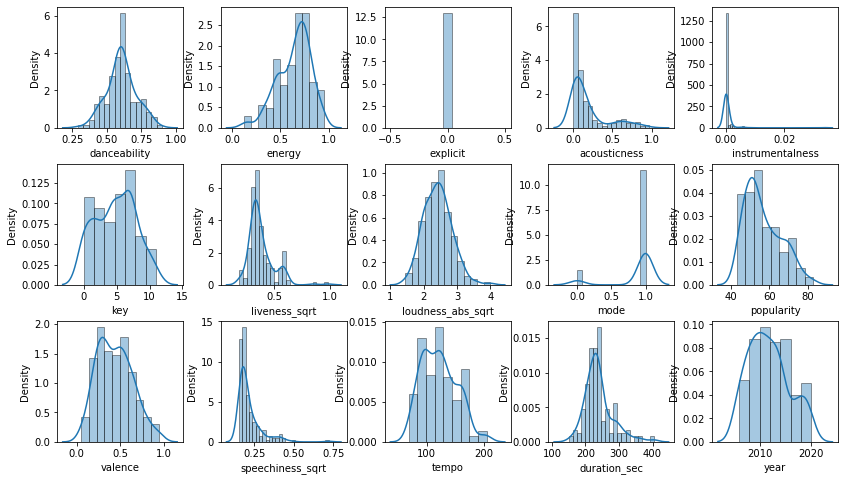

In [21]:
fea = list(new_data.select_dtypes(['int','float']).columns)
fig, axe = plt.subplots(3,5,figsize=(14,8))
plt.subplots_adjust(hspace=0.3,wspace=0.3)
i,j = 0, 0
for item in fea:
    sns.distplot(data_taylor[item],ax=axe[i][j],hist_kws=dict(edgecolor='black'))
    j += 1
    if j==5:
        i+=1
        j=0

This pie plot shows the proportion of Taylor's songs released in each year. 2010 have the largest part, followed by 2014 and 2006. In 2015, Taylor didnt released single song in the whole year, same as 2018 and 2007.

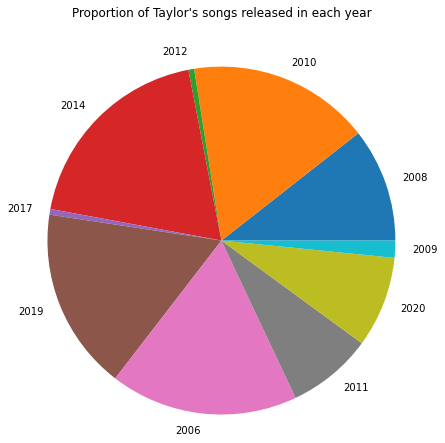

In [22]:
plt.pie(data_taylor.groupby('year')['name'].count(),labels = data_taylor.year.unique(),radius=2)
plt.title('Proportion of Taylor\'s songs released in each year',y=1.5)
plt.show()

First, select those artists who have more than 50 songs in the dataset, and calculate the relative popularity by summing the popularity of the each songs of that singer and divide by the number of the song he/she published.

In [23]:
artist = new_data.groupby('artists')['name'].count()>50
artist = artist[artist==True]
data_songs_over_50 = new_data[new_data.artists.isin(list(artist.index))]
popularity = data_songs_over_50.groupby('artists')['popularity'].sum()/data_songs_over_50.groupby('artists')['popularity'].count()
popularity = round(popularity,2)

According to the fig, the most relative popular singer in spotify in Twenty One Pilots with 66.46 point, followed by BTS, which the difference between them is only 0.02, even the difference between top 1 and top 10 is 4.73, that not so huge.

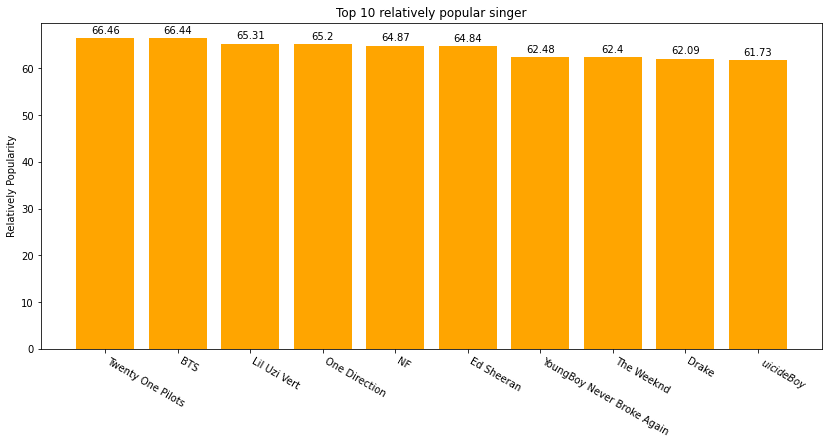

In [24]:
popularity = popularity.sort_values(ascending=False)[:10]
plt.figure(figsize=(14,6))
plt.bar(x=popularity.index,height=popularity.values,color='orange')
plt.xticks(rotation=330,va='top',ha='left')
plt.ylabel('Relatively Popularity')
plt.title('Top 10 relatively popular singer')
for x,y in zip(popularity.index,popularity.values):
    plt.text(x,y+1,y,ha='center')
plt.show()

In [25]:
Fran = new_data[new_data.artists == art_25.index[4]]

The pie plot shows the proportion of each decade, the reason why 1920-1930 was small is cause the dataset only count the sound since 1928. The number of songs released in each decade didnt have significant difference since 1950.

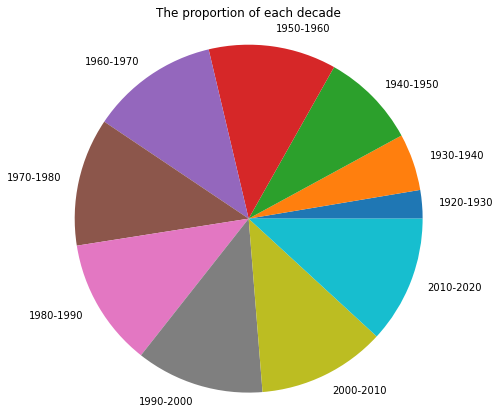

In [142]:
da = {}
for i in range(1920,2020,10):
    j = i+10
    decade = np.arange(i,j)
    index = str(i)+'-'+str(j)
    values = new_data[new_data.year.isin(decade)].count().iloc[0]
    da[index] = values
plt.pie(da.values(),labels=da.keys(),radius=2)
plt.title('The proportion of each decade',y=1.4)
plt.show()

The fig show that, the more energetic the music is, the loudness_abs_sqrt highly could be lower. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


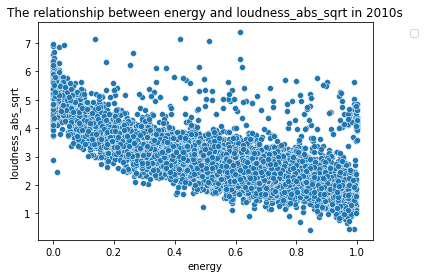

In [27]:
sns.scatterplot(data=new_data[new_data.year.isin(np.arange(2010,2020))],x='energy',y='loudness_abs_sqrt')
plt.legend(loc='right', bbox_to_anchor=(1.15, 0.95))
plt.title('The relationship between energy and loudness_abs_sqrt in 2010s')
plt.show()

Select the index with dtype of 'int' and 'float' from the data for KMeans.

In [28]:
cluster = data.select_dtypes(['int','float']).columns

In [29]:
a = list(cluster)
a.remove('year')
a.remove('key')
a.remove('mode')
a.remove('popularity')
a.remove('explicit')
cluster = a

In [30]:
decade = np.arange(2000,2010)

Get the data with requested index

In [31]:
data_cluster = data[cluster].copy()

Import the MinMaxcaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
std = MinMaxScaler()

There are 3 columns need to scale, which is loudness, tempo and duration

In [34]:
data_cluster

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.9950,0.708,158648,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790
1,0.9940,0.379,282133,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767
2,0.6040,0.749,104300,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800
3,0.9950,0.781,180760,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200
4,0.9900,0.210,687733,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693
...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060
169905,0.0167,0.719,167468,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700
169906,0.5380,0.514,180700,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530
169907,0.0714,0.646,167308,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720


In [35]:
data_cluster.tempo = std.fit_transform(np.array(data_cluster['tempo']).reshape(-1,1))
data_cluster.duration_ms = std.fit_transform(np.array(data_cluster['duration_ms']).reshape(-1,1))
data_cluster.loudness = std.fit_transform(np.array(data_cluster['loudness']).reshape(-1,1))

Good to go

In [36]:
data_cluster

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.9950,0.708,0.028442,0.1950,0.563000,0.1510,0.745000,0.0506,0.485348,0.7790
1,0.9940,0.379,0.051316,0.0135,0.901000,0.0763,0.494026,0.0462,0.344019,0.0767
2,0.6040,0.749,0.018374,0.2200,0.000000,0.1190,0.627609,0.9290,0.439086,0.8800
3,0.9950,0.781,0.032538,0.1300,0.887000,0.1110,0.708887,0.0926,0.442470,0.7200
4,0.9900,0.210,0.126450,0.2040,0.908000,0.0980,0.676079,0.0424,0.254614,0.0693
...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,0.029396,0.4430,0.000032,0.0891,0.822786,0.1430,0.409732,0.3060
169905,0.0167,0.719,0.030076,0.3850,0.031300,0.1110,0.768820,0.0403,0.524395,0.2700
169906,0.5380,0.514,0.032527,0.5390,0.002330,0.1080,0.793485,0.1050,0.506778,0.1530
169907,0.0714,0.646,0.030046,0.7610,0.000000,0.2220,0.899585,0.0385,0.532244,0.4720


Import KMeans

In [37]:
from sklearn.cluster import KMeans

Check the score and inertia of KMeans with number of cluster in range(1,15)

In [38]:
res_in = []
res = []
for i in range(1,10):
    clu = KMeans(n_clusters=i)
    clu.fit(data_cluster)
    res_in.append(clu.inertia_)
    res.append(clu.score(data_cluster))

By using the elbow method, the idealy number of cluster is 3

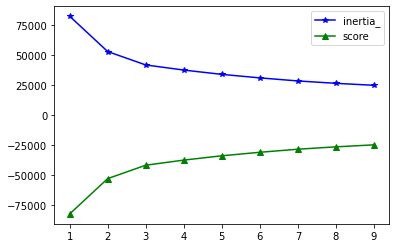

In [39]:
plt.plot(np.arange(1,10),res_in,'b*-')
plt.plot(np.arange(1,10),res,'g^-')
plt.legend(['inertia_','score'])

Using the PCA in order to plot the data on a 2D fig.

In [41]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2,random_state=42,)

In [47]:
pc_df = pca.fit_transform(data_cluster)
#pc_df = pca.fit_transform(data[cluster1])

The explained_variance_ratio with 2 components is not that so goood, but it barely can be used as representative of the data, since 62% variance_ratio.

In [48]:
pca.explained_variance_ratio_

array([0.46394764, 0.16749219])

Set cluster number equal 3, and predict the data with data_cluster.

In [66]:
pca_data = KMeans(n_clusters=3).fit_predict(data_cluster)

Plot the data_clutser and based on the label of KMeans, painted with different color, 

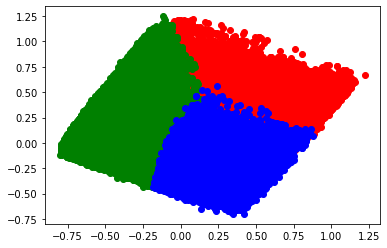

In [67]:
plt.scatter(pc_df[pca_data==0,0],pc_df[pca_data==0,1],c='r')
plt.scatter(pc_df[pca_data==1,0],pc_df[pca_data==1,1],c='g')
plt.scatter(pc_df[pca_data==2,0],pc_df[pca_data==2,1],c='b')

In [68]:
data_cluster['label'] = pca_data
pca_data

array([0, 0, 2, ..., 2, 1, 1], dtype=int32)

Import silhouetee_score to evaluate the performance of KMeans, the silhouetee_score is between -1,1, the bigger, the better.

In [69]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(data_cluster,data_cluster.label,)

0.5484594917916169

Group by the label, and count the mean value of each columns in every label. It's obviously that the label has huge difference comparing to label 0 and 2 in the acousticness and energy. For the label 0, is has huge difference in instumentalness than other 2 label, and slightly difference in tempo and valence.

Cluster 0:
    The music in cluster 0 has high acousticness, instrumentalness, on the other hand, it has low energy, liveness, loudness, speechiness and valence. 

Cluster 1:
    The music in cluster 1 has low acousticness compare to ohter label, on the countray, it has high energy and liveness, valence and danceability, this may indicate that the music is cluster 1 is more likely to rock music.
    
Cluster 2:
    The music in cluster 2 has lower acousticness than cluster 0, but higher than label 1, it has shorest duration and medium engery, futhermore, it has lowest instrmentalness, it kindly like cluster 2 is sandwitched between the cluster 1 and cluster 0.

In [79]:
data_cluster.groupby('label').mean()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
label,,,,,,,,,,
0,0.881053,0.418259,0.045521,0.247037,0.815101,0.183303,0.664408,0.059529,0.438298,0.394527
1,0.149663,0.590871,0.043337,0.690268,0.061223,0.210048,0.812036,0.099487,0.503787,0.599889
2,0.794986,0.516459,0.038553,0.317105,0.030416,0.211732,0.733616,0.100869,0.462735,0.497435


Import scipy to run a ttest on the data_cluster, to check if there is a significant difference with the columns describe above.

In [80]:
from scipy.stats import ttest_ind

Based on the label, extract the data

In [88]:
data_0 = data_cluster[data_cluster.label==0]
data_1 = data_cluster[data_cluster.label==1]
data_2 = data_cluster[data_cluster.label==2]

In [103]:
t_acous, p_acous = ttest_ind(data_1.acousticness,data_2.acousticness)
t_ener, p_ener = ttest_ind(data_1.energy,data_2.energy)
t_instru, p_instru = ttest_ind(data_0.instrumentalness,data_1.instrumentalness)

Thr result shows that they do have significante difference.

In [107]:
print(f'p value of acousticness: {p_acous}')
print(f'p value of energy: {p_ener}')
print(f'p value of instrumentalness: {p_instru}')

p value of acousticness: 0.0
p value of energy: 0.0
p value of instrumentalness: 0.0


The following three code cell shows the top 5 popularity songs in each clusters.

In the cluster 0, the most popular song is Everything is Wanted by Billie Eillish, for the rest 4 songs, 3 of them is belong to white noise, which show that the music is cluster 1 might be more soft and gentle.

In the cluster 1, the most popular song is Blinding Light by The Weekend which is a fast beats song, the rest 4 songs also has a fast beats or rhythmic.

In the cluster 2, the most popular song is Death Bed by Powfu and beadadoobee, which has a soft beats but also rhythmic, kind like the mix of cluster 0 and cluster 1.

In [131]:
new_data.iloc[data_0.index].sort_values('popularity',ascending=False)[{'name','artists'}].head()

,name,artists
87857,everything i wanted,Billie Eilish
87653,Clean White Noise - Loopable with no fade,"Erik Eriksson', 'White Noise Baby Sleep', 'Whi..."
87651,White Noise - 500 hz,Granular
87675,Buttercup,Jack Stauber
87652,White Noise - 145 hz,Granular


In [132]:
new_data.iloc[data_1.index].sort_values('popularity',ascending=False)[{'name','artists'}].head()

,name,artists
87942,Blinding Lights,The Weeknd
87940,ROCKSTAR (feat. Roddy Ricch),"DaBaby', 'Roddy Ricch"
87941,THE SCOTTS,"THE SCOTTS', 'Travis Scott', 'Kid Cudi"
87852,ily (i love you baby) (feat. Emilee),"Surf Mesa', 'Emilee"
87844,Supalonely,"BENEE', 'Gus Dapperton"


In [133]:
new_data.iloc[data_2.index].sort_values('popularity',ascending=False)[{'name','artists'}].head()

,name,artists
87949,death bed (coffee for your head) (feat. beabad...,"Powfu', 'beabadoobee"
87943,Party Girl,StaySolidRocky
87858,Dance Monkey,Tones And I
87856,Someone You Loved,Lewis Capaldi
87865,Memories,Maroon 5


# Conclusion

In this dataset, since the dataset has no missing value and 'clean', only few tranform method apply to the dataset, also some feature were used to evaluate some columns in the dataset. Tn the end, Kmeans was used to check if the data in the dataset can be grouped in servels cluster, futhermore, PCA was used in order to plot the data into 2D fig with the clutser that classified by the KMeans. The project find some interesting thing within the dataset:

First: Эрнест Хемингуэй published 1215 songs which make him the singer with most songs. The average number of songs publish is 5.09 and the median is 1, this shows that in the dataset half of the singers only published 1 songs.

Second: By analysing the songs published by Taylor Swift, there were some years she didnt published any songs, the average popuar score of her songs is 56, the style of her songs are average high danceability and energy but with low acousticness and instrumentalness.

Third: By calculating the average popular score on each singer who at least published more than 50 songs, the most popular singer is Twenty One Pilots with 66.46 socre, followed by BTS with 0.02 differnece.

Fourth: Using the elbow method, the data can be clustered into 3 group, which are music that are gentel and soft, rhythmic music, and the mix of those two types of music. The silhoutee_score also shows that this cluster has good performance.

Thnaks for watching.